テーマ
卒業式の写真から写っている人数をカウントするアプリ

卒業式やクラス写真では、写っている人数を目視で数えるのが大変で、見落としも起きやすい。
顔検出技術を使えば、集合写真から自動で人数を推定でき、記念写真の整理やイベント記録に役立つと考えた。


0: 480x640 5 persons, 5 ties, 94.7ms
Speed: 2.6ms preprocess, 94.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


(np.float64(-0.5), np.float64(1476.5), np.float64(1107.5), np.float64(-0.5))

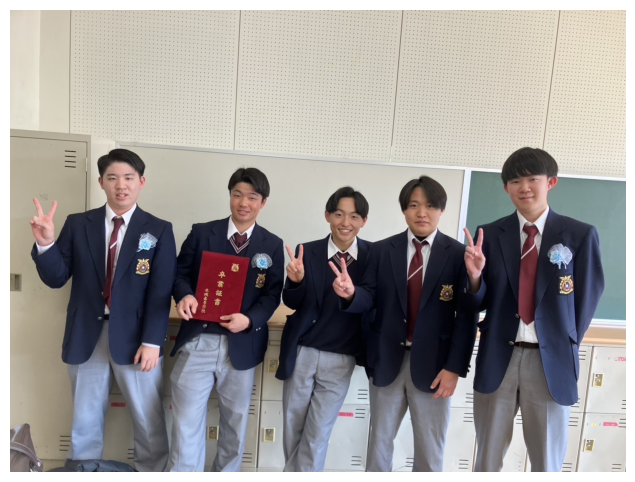

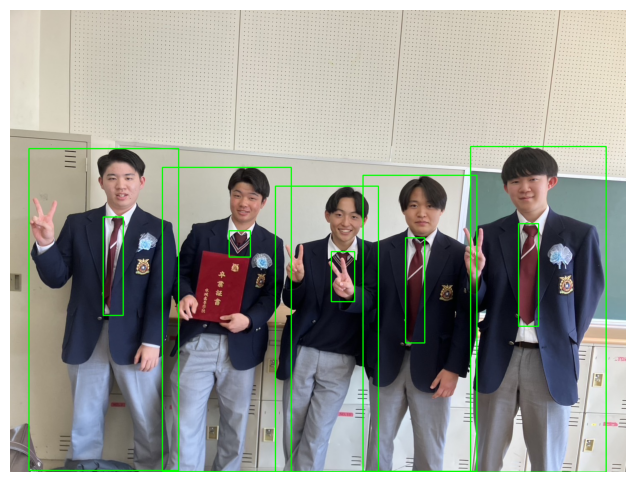

In [8]:
!pip install ultralytics opencv-python matplotlib
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
# YOLOv8（自動でダウンロードされる）
model = YOLO("yolov8n.pt")
# 画像ファイル（Notebookと同じフォルダに置く）
img = cv2.imread("IMG_2249.JPG")

# BGR → RGB（matplotlib用）
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.axis("off")
results = model(img_rgb)

boxes = results[0].boxes
person_count = len(boxes)

person_count
img_draw = img_rgb.copy()

for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(10,6))
plt.imshow(img_draw)
plt.axis("off")
